In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
! pip install tesseract
! pip install pytesseract
! pip install transformers
! pip install datasets
!which tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from google.colab.patches import cv2_imshow
from imutils.perspective import four_point_transform
import pytesseract
#import imutils
import cv2
from google.colab.patches import cv2_imshow

pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )

In [ ]:
image = cv2.imread('001.jpg')
# gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# converting it to binary image by Thresholding
# this step is require if you have colored image because if you skip this part
# then tesseract won't able to detect text correctly and this will give incorrect result
# threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# display image
# cv2_imshow(threshold_img)
# Maintain output window until user presses a key
# cv2.waitKey(0)
# Destroying present windows on screen
# cv2.destroyAllWindows()


In [ ]:
# configuring parameters for tesseract
#--psm NUM             Specify page segmentation mode.
#--oem NUM             Specify OCR Engine mode.
custom_config = r'--oem 3 --psm 6'
'''
Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
'''

# now feeding image to tesseract and extract text
# extract text to string
text = pytesseract.image_to_string(image)
print(text)
# extract text to dataframe
details = pytesseract.image_to_data(image, lang='eng', config=custom_config, output_type='data.frame')

details.head(100)


tan woon yann

INDAH GIFT & HOME BECO
27, JALAN DEDAP 13,
TANAN JOHOR JAYA,
81100 JOHOR BAHRU, JOHOR.
Tel:07-3507405 Fax:07-3558160

RECEIPT

19/10/2018 20:49:59 #01
Cashier: CN Location/SP: 05 /0531

MB: 4026588
Room No: Of 050100025279

Desc/Iten Gty Price Amt/(RH)

ST-PRIVILEGE CARD/GD INDAH

89888 1 10.00 10.00

GF-TABLE LAMP/STITCH <i>

62483 1 55.90 55.90
@MIsc 10.00%

HTotal Qty 2

TOTAL AHT.

ROUNDING ADI.

 

    

Thank You ! Please Come Again !
Goods Sold Are Not Retui
Healing In Wholesale And fi

  



,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,439,1004,-1,NaN
1,2,1,1,0,0,0,27,52,377,910,-1,NaN
2,3,1,1,1,0,0,78,52,244,186,-1,NaN
3,4,1,1,1,1,0,78,52,244,31,-1,NaN
4,5,1,1,1,1,1,78,52,52,23,93,tan
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,1,1,3,14,1,263,769,17,15,55,RH
96,5,1,1,3,14,2,328,769,46,15,79,"60,30"
97,5,1,1,3,14,3,384,752,20,29,88,J
98,4,1,1,3,15,0,28,794,346,16,-1,NaN


In [ ]:
# As we see when we just extract text to string, some parts of the text are cut off
print(text)

tan woon yann

INDAH GIFT & HOME BECO
27, JALAN DEDAP 13,
TANAN JOHOR JAYA,
81100 JOHOR BAHRU, JOHOR.
Tel:07-3507405 Fax:07-3558160

RECEIPT

19/10/2018 20:49:59 #01
Cashier: CN Location/SP: 05 /0531

MB: 4026588
Room No: Of 050100025279

Desc/Iten Gty Price Amt/(RH)

ST-PRIVILEGE CARD/GD INDAH

89888 1 10.00 10.00

GF-TABLE LAMP/STITCH <i>

62483 1 55.90 55.90
@MIsc 10.00%

HTotal Qty 2

TOTAL AHT.

ROUNDING ADI.

 

    

Thank You ! Please Come Again !
Goods Sold Are Not Retui
Healing In Wholesale And fi

  



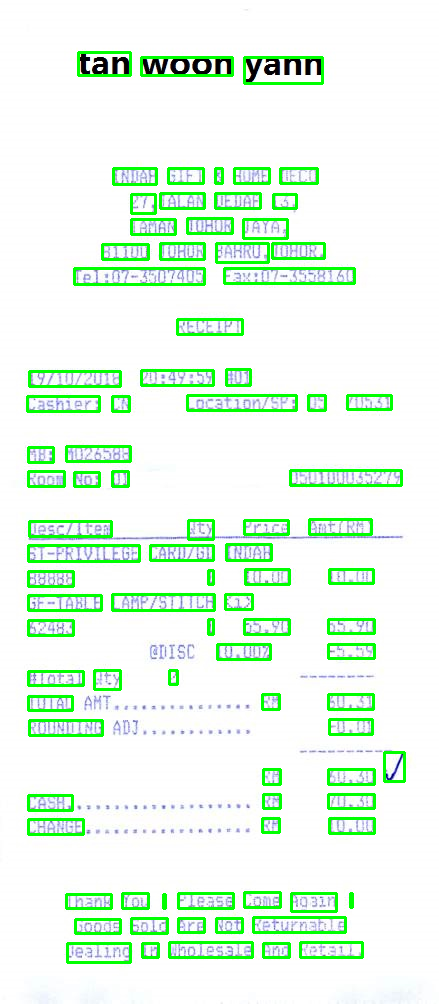

In [ ]:
''' Highlight text boxes and write boxes coordinates to coords.txt.
'''

total_boxes = len(details['text'])

with open('coords.txt', 'w') as file_coords:
  for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
      (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
      threshold_img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      file_coords.write(f"{x},{y},{x+w},{y+w},{x},{y+h},{x+w},{y+h},{details['text'][sequence_number]}\n")

cv2_imshow(threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import pandas as pd
from collections import defaultdict

# Let's try to create our text from dataframe results
# This way we ensure all the parsed text parts are included into our result text
text = defaultdict(list)
cur_line_num = 0
for index, row in details.iterrows():
    word = row['text']
    word_num = row['word_num']
    if(word_num == 0):
        cur_line_num+=1
    if(word!='' and not pd.isna(word)): 
      text[cur_line_num].append(word)

full_text = ""
for sen in text.keys():
  full_text += ' '.join(text[sen])
  full_text += '\n'

print(full_text)


tan woon yann
INDAH GIFT & HOME BECO
27, JALAN DEDAP 13,
TAMAN JOHOR JAYA,
81100 JOHOR BAHRU, JOHOR.
Tel:07-3507405 Fax:07-3558160
RECEIPT
19/10/2018 20:49:59 #01
Cashier: CN Location/SP: 05 /0531
MB: 4026568
Room No: Of 050100025279
Desc/Iten Gty Price Amt/(RH)
ST-PRIVILEGE CARD/GD INDAH
89888 1 10.00 10.00
GF-TABLE LAMP/STITCH <i>
62483 1 55.90 55.90
@MIsc 10.00% “5.59.
HTotal Qty 2 See
TOTAL ANTecccnveccereees RH 60.31
ROUNDING ADJ. ...0+se0e0e “0.01
RH 60,30 J
CASH. so sscccevevseeveaee RH 70.30
CHANGE con sccsecaceesseee RH 10.00
Thank You ! Please Come Again !
Goods Sold Are Not Returnable
Healing In Wholesale And Retsil.



In [ ]:
# Name dentity recognition using Spacy
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(full_text)

displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

#for word in doc.ents:
    #print(word.text, word.label_)

IoU metrics for segmentation model

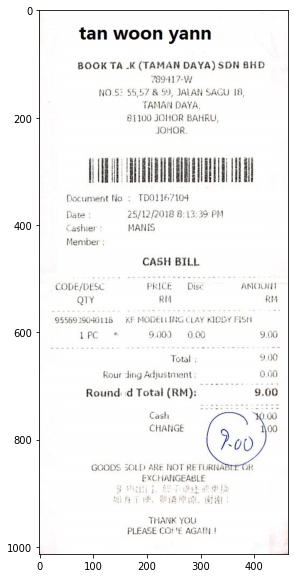

In [5]:
import cv2
import numpy
import matplotlib.pyplot as plt
img = cv2.imread('000.jpg')
plt.figure(figsize=(25,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

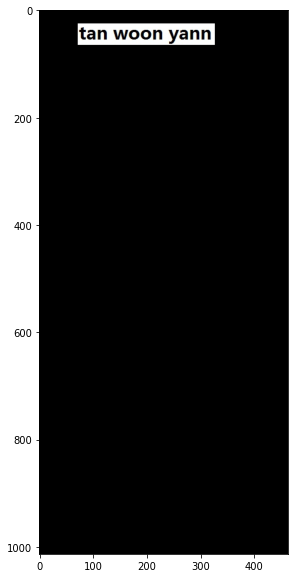

In [7]:
# An example of first bounding box
first_bb_points = [[72, 25], [326, 25], [326, 64], [72, 64]]
stencil = numpy.zeros(img.shape).astype(img.dtype)
contours = [numpy.array(first_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result1 = cv2.bitwise_and(img, stencil)
result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,10))
plt.imshow(result1)

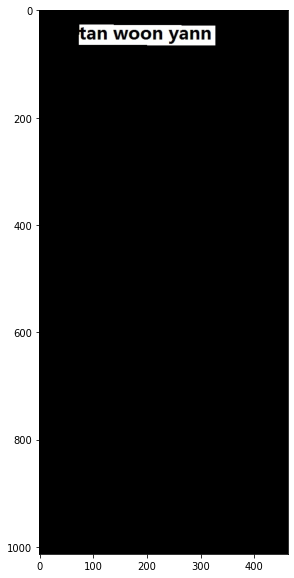

In [10]:
# An example of second bounding box
second_bb_points = [[75, 27], [327, 29], [327, 65], [74, 64]]
stencil = numpy.zeros(img.shape).astype(img.dtype)
contours = [numpy.array(second_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result2 = cv2.bitwise_and(img, stencil)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,10))
plt.imshow(result2)

In [11]:
# IoU calculation
intersection = numpy.logical_and(result1, result2)
union = numpy.logical_or(result1, result2)
iou_score = numpy.sum(intersection) / numpy.sum(union)
print('IoU is %s' % iou_score)

IoU is 0.8924193321121601


In [15]:
from shapely.geometry import Polygon


def calculate_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    return iou


box_1 = [[72, 25], [326, 25], [326, 64], [72, 64]]
box_2 = [[75, 27], [327, 29], [327, 65], [74, 64]]

print(calculate_iou(box_1, box_2))

0.8994777712828206
